# ★ Introduction

This project will aim to explore and analyze 8 months of transaction data using Python libraries. 

The goal is to:

- Uncover monthly spending trends

- Explore saving goal performance

- Identify category breakdowns

- Forecast future spending 

# ★ The Data



This section will focus on revealing, understanding, and cleaning the data.

Starting off by importing all libraries that will be used throughout the exploration.

In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Next is to read and store the file. 

Before displaying the data, there's a few quick changes that need to be made. 

The raw table has columns for "Description," which will be removed for privacy purposes. The values in the "Amount" column will also been randomized for a similar reason. 

In [482]:
df = pd.read_csv("/Users/alexandrateodorescu/Documents/DATA/spendingAnalysis/transactionHistory.csv") 

df["Amount"] = (df["Amount"] * np.random.uniform(0.7, 1.3, size=len(df))).round(2)

df = df.drop(columns=["Description"]) 

df

,Date,Category,Amount
0,2025-04-24,Meals & Drinks,15.25
1,2025-04-21,Gifts,81.87
2,2025-04-21,Meals & Drinks,11.58
3,2025-04-21,Meals & Drinks,6.56
4,2025-04-21,Cosmetics,12.94
...,...,...,...
316,2024-09-03,Meals & Drinks,4.24
317,2024-09-03,Meals & Drinks,16.13
318,2024-09-03,Entertainment,31.11
319,2024-09-03,Entertainment,13.82


# ★ Data Cleaning

Let's get a better understanding of what's in the dataset. Starting by verifying that there are no missing values.

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      321 non-null    object 
 1   Category  321 non-null    object 
 2   Amount    321 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.7+ KB


Non-null counts are all equal to the number of rows. So, no cells are empty. 👍 

Now, to get a better understanding of the numeric values:

In [484]:
df.describe()

,Amount
count,321.000000
mean,1.336542
std,127.353969
min,-1147.330000
25%,5.960000
50%,9.390000
75%,20.470000
max,271.850000


Min amount is -1147.33, so there's at least one negative amount in this set. Let's determine how many there are. 

In [485]:
(df["Amount"] < 0).sum()

13

Let's identify all the negative amounts and see how they can be adressed.

Starting by observing all categories that exist in the dataset:

In [486]:
df["Category"].value_counts()

Category
Meals & Drinks      123
Food & Snacks        77
Clothing             20
Cosmetics            17
Miscellaneous        16
Gifts                14
Bill payment         12
Entertainment        11
Activities            9
Transportation        8
School                7
Dorm necessities      5
Discretionary         2
Name: count, dtype: int64

Taking a closer look at the "Bill payment" category, in which there are 12 values.

In [487]:
bill_payment = df[df["Category"] == "Bill payment"]

bill_payment

,Date,Category,Amount
29,2025-04-03,Bill payment,-662.76
69,2025-03-06,Bill payment,-649.10
124,2025-02-04,Bill payment,-719.92
137,2025-01-21,Bill payment,-226.04
145,2025-01-16,Bill payment,-267.79
168,2025-01-06,Bill payment,-867.56
178,2024-12-23,Bill payment,-375.14
200,2024-12-04,Bill payment,-149.02
205,2024-12-02,Bill payment,-646.26
250,2024-10-28,Bill payment,-1147.33


It is easily observed that all amounts in the category are negative. 

Bill payments do not hold any value for this exploration, so the category can be removed altogether.

Then, to ensure that the rest of the amounts are positive, every number in the column can be overwritten by its absolute value.

In [489]:
df = df[df["Category"] != "Bill payment"]

df["Amount"] = df["Amount"].abs()

df

,Date,Category,Amount
0,2025-04-24,Meals & Drinks,15.25
1,2025-04-21,Gifts,81.87
2,2025-04-21,Meals & Drinks,11.58
3,2025-04-21,Meals & Drinks,6.56
4,2025-04-21,Cosmetics,12.94
...,...,...,...
316,2024-09-03,Meals & Drinks,4.24
317,2024-09-03,Meals & Drinks,16.13
318,2024-09-03,Entertainment,31.11
319,2024-09-03,Entertainment,13.82


Let's move onto further cleaning:

For effective analysis, the "Date" column will be converted to datetime. 

A fourth column titled "Month" can also be added, which will be useful later on when we take a look at monthly spending. 

In [490]:
df["Date"] = pd.to_datetime(df["Date"])

df["Month"] = df["Date"].dt.to_period("M")

df

,Date,Category,Amount,Month
0,2025-04-24,Meals & Drinks,15.25,2025-04
1,2025-04-21,Gifts,81.87,2025-04
2,2025-04-21,Meals & Drinks,11.58,2025-04
3,2025-04-21,Meals & Drinks,6.56,2025-04
4,2025-04-21,Cosmetics,12.94,2025-04
...,...,...,...,...
316,2024-09-03,Meals & Drinks,4.24,2024-09
317,2024-09-03,Meals & Drinks,16.13,2024-09
318,2024-09-03,Entertainment,31.11,2024-09
319,2024-09-03,Entertainment,13.82,2024-09


The cleaned set has 309 rows and 4 columns.

# ★ Overview of Monthly Spending

The next two sections will focus on monthly spending. 

It might be useful to observe a summary first:

In [512]:
monthly_totals = df.groupby("Month")["Amount"].sum()

monthly_totals = monthly_totals.reset_index()

monthly_totals.columns = ["Month", "Total Spent"]

total_spent = monthly_totals["Total Spent"].sum()

print(f"\n💸 Total spent in first year: ${total_spent:.2f}\n")

monthly_totals


💸 Total spent in first year: $7086.19



,Month,Total Spent
0,2024-09,1087.47
1,2024-10,770.02
2,2024-11,555.05
3,2024-12,1259.38
4,2025-01,1356.54
5,2025-02,749.86
6,2025-03,767.74
7,2025-04,540.13


Through this table, it is evident that the amount spent every month varies. 

Some months, around $500 was spent, and other months, more than double that amount was spent. 

➤ A bar graph will be useful to vizualize how spending varied over these 8 months:

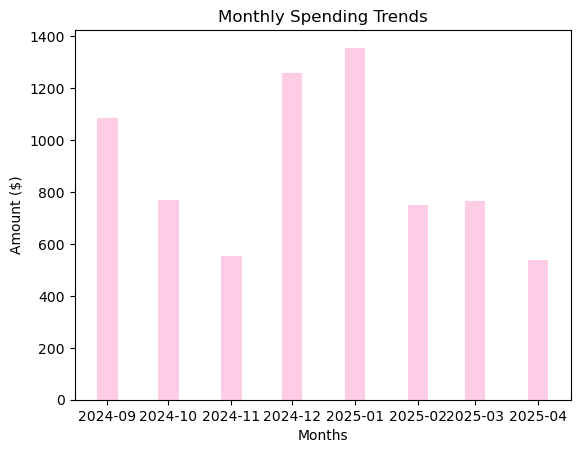

In [513]:
monthly_totals["Month"] = monthly_totals["Month"].dt.to_timestamp()

plt.bar(monthly_totals["Month"], monthly_totals["Total Spent"], width = 10, color="#fccde5")

plt.title("Monthly Spending Trends")

plt.xlabel("Months")

plt.ylabel("Amount ($)")

plt.show()

From this bar graph, it is deduced that January 2025 incurred the highest spending, while April 2025 was the month with the lowest spending. 

December also had the second highest spending. 

A possible reason for this is that the winter holidays are around that time, when people typically have greater expenses due to travel, gifts, etc. 

We will take a look at the category breakdowns later on. For the time being, the bar graph provides useful insight into the spending distribution across these 8 months. 

Let's investigate further and take a look at the average monthly spending:

In [514]:
(monthly_totals["Total Spent"].mean()).round(2)

885.77

So, on average 885.77 was spent every month.

# ★ Closer Look at Every Month

Now, isolating every month with a category breakdown. Starting with September 2024.

In [494]:
sept_spending = df[df["Month"]== "2024-09"]

sept_spending = sept_spending.groupby("Category")["Amount"].sum()

sept_spending = sept_spending.reset_index()

sept_total = sept_spending["Amount"].sum()

sept_spending["Percent of Monthly Total (%)"] = round((sept_spending["Amount"]/ sept_total) * 100, 2)

sept_spending = sept_spending.sort_values(by = "Amount", ascending = False)

print(f"\n☀️ September Spending: ${sept_total:.2f}\n")
sept_spending


☀️ September Spending: $1087.47



,Category,Amount,Percent of Monthly Total (%)
0,Clothing,445.21,40.94
4,Meals & Drinks,167.32,15.39
7,Transportation,152.38,14.01
3,Food & Snacks,127.23,11.70
2,Entertainment,96.39,8.86
1,Dorm necessities,53.76,4.94
6,School,24.15,2.22
5,Miscellaneous,21.03,1.93


In [495]:
oct_spending = df[df["Month"]== "2024-10"]

oct_spending = oct_spending.groupby("Category")["Amount"].sum()

oct_spending = oct_spending.reset_index()

oct_total = oct_spending["Amount"].sum()

oct_spending["Percent of Monthly Total (%)"] = round((oct_spending["Amount"]/ oct_total) * 100, 2)

oct_spending = oct_spending.sort_values(by = "Amount", ascending = False)

print(f"\n🍂 October Spending: ${oct_total:.2f}\n")
oct_spending


🍂 October Spending: $770.02



,Category,Amount,Percent of Monthly Total (%)
0,Clothing,282.52,36.69
4,Meals & Drinks,172.39,22.39
1,Cosmetics,127.28,16.53
3,Food & Snacks,87.69,11.39
2,Entertainment,67.25,8.73
5,Miscellaneous,32.89,4.27


In [496]:
nov_spending = df[df["Month"]== "2024-11"]

nov_spending = nov_spending.groupby("Category")["Amount"].sum()

nov_spending = nov_spending.reset_index()

nov_total = nov_spending["Amount"].sum()

nov_spending["Percent of Monthly Total (%)"] = round((nov_spending["Amount"]/ nov_total) * 100, 2)

nov_spending = nov_spending.sort_values(by = "Amount", ascending = False)

print(f"\n🧣 November Spending: ${nov_total:.2f}\n")
nov_spending


🧣 November Spending: $555.05



,Category,Amount,Percent of Monthly Total (%)
0,Activities,142.65,25.70
4,Food & Snacks,125.66,22.64
5,Meals & Drinks,121.05,21.81
2,Cosmetics,64.20,11.57
1,Clothing,61.02,10.99
3,Entertainment,24.52,4.42
6,Miscellaneous,12.57,2.26
7,Transportation,3.38,0.61


In [497]:
dec_spending = df[df["Month"]== "2024-12"]

dec_spending = dec_spending.groupby("Category")["Amount"].sum()

dec_spending = dec_spending.reset_index()

dec_total = dec_spending["Amount"].sum()

dec_spending["Percent of Monthly Total (%)"] = round((dec_spending["Amount"]/ dec_total) * 100, 2)

dec_spending = dec_spending.sort_values(by = "Amount", ascending = False)

print(f"\n🎄 December Spending: ${dec_total:.2f}\n")
dec_spending


🎄 December Spending: $1259.38



,Category,Amount,Percent of Monthly Total (%)
4,Gifts,413.20,32.81
7,Transportation,353.87,28.10
1,Clothing,289.77,23.01
5,Meals & Drinks,84.59,6.72
3,Food & Snacks,68.30,5.42
0,Activities,29.84,2.37
2,Cosmetics,13.59,1.08
6,Miscellaneous,6.22,0.49


In [498]:
jan_spending = df[df["Month"]== "2025-01"]

jan_spending = jan_spending.groupby("Category")["Amount"].sum()

jan_spending = jan_spending.reset_index()

jan_total = jan_spending["Amount"].sum()

jan_spending["Percent of Monthly Total (%)"] = round((jan_spending["Amount"]/ jan_total) * 100, 2)

jan_spending = jan_spending.sort_values(by = "Amount", ascending = False)

print(f"\n☃️ January Spending: ${jan_total:.2f}\n")
jan_spending


☃️ January Spending: $1356.54



,Category,Amount,Percent of Monthly Total (%)
7,School,392.75,28.95
8,Transportation,271.85,20.04
5,Meals & Drinks,155.31,11.45
3,Entertainment,142.80,10.53
4,Food & Snacks,128.10,9.44
1,Clothing,124.54,9.18
0,Activities,63.17,4.66
2,Cosmetics,45.72,3.37
6,Miscellaneous,32.30,2.38


In [499]:
feb_spending = df[df["Month"]== "2025-02"]

feb_spending = feb_spending.groupby("Category")["Amount"].sum()

feb_spending = feb_spending.reset_index()

feb_total = feb_spending["Amount"].sum()

feb_spending["Percent of Monthly Total (%)"] = round((feb_spending["Amount"]/ feb_total) * 100, 2)

feb_spending = feb_spending.sort_values(by = "Amount", ascending = False)

print(f"\n🎿 February Spending: ${feb_total:.2f}\n")
feb_spending


🎿 February Spending: $749.86



,Category,Amount,Percent of Monthly Total (%)
6,Meals & Drinks,353.43,47.13
4,Food & Snacks,130.24,17.37
1,Cosmetics,112.82,15.05
0,Clothing,50.42,6.72
5,Gifts,44.54,5.94
2,Dorm necessities,28.29,3.77
7,Miscellaneous,21.19,2.83
3,Entertainment,8.93,1.19


In [500]:
mar_spending = df[df["Month"]== "2025-03"]

mar_spending = mar_spending.groupby("Category")["Amount"].sum()

mar_spending = mar_spending.reset_index()

mar_total = mar_spending["Amount"].sum()

mar_spending["Percent of Monthly Total (%)"] = (mar_spending["Amount"]/ mar_total) * 100

mar_spending = mar_spending.sort_values(by = "Amount", ascending = False)

print(f"\n☁️ March Spending: ${mar_total:.2f}\n")
mar_spending


☁️ March Spending: $767.74



,Category,Amount,Percent of Monthly Total (%)
8,Transportation,192.82,25.115273
0,Activities,150.30,19.576940
6,Meals & Drinks,145.05,18.893115
5,Food & Snacks,92.27,12.018392
2,Cosmetics,73.46,9.568343
4,Entertainment,50.01,6.513924
1,Clothing,41.82,5.447157
7,Miscellaneous,18.30,2.383619
3,Discretionary,3.71,0.483237


In [501]:
apr_spending = df[df["Month"]== "2025-04"]

apr_spending = apr_spending.groupby("Category")["Amount"].sum()

apr_spending = apr_spending.reset_index()

apr_total = apr_spending["Amount"].sum()

apr_spending["Percent of Monthly Total (%)"] = (apr_spending["Amount"]/ apr_total) * 100

apr_spending = apr_spending.sort_values(by = "Amount", ascending = False)

print(f"\n☔️ April Spending: ${apr_total:.2f}\n")
apr_spending


☔️ April Spending: $540.13



,Category,Amount,Percent of Monthly Total (%)
5,Gifts,238.84,44.218984
6,Meals & Drinks,102.30,18.939885
2,Discretionary,50.76,9.397738
0,Clothing,46.45,8.599782
4,Food & Snacks,43.39,8.033251
3,Dorm necessities,29.18,5.402403
1,Cosmetics,12.94,2.395720
8,School,8.23,1.523707
7,Miscellaneous,8.04,1.488531


Months with highest spending:

1. January: $1356.54 , Top Category - School

2.  Decenber: $1259.38, Top Category - Gifts

3.  September: $1087.47, Top Category - Clothing

# ★ Saving Goals

This section will focus on monthly saving performance. The following assumptions will be made:

- There is a fixed monthly income of $1100

- The saving goal is $300 a month 

- The money that is left over (income - expenses) is all saved

Note: A negative amount of money left over indicates that more was spent than earned that month.

A table can be created to summarize how much money was spent every month, how much was left over, and whether the saving goal was achieved for that month.

In [516]:
monthly_totals = df.groupby("Month")["Amount"].sum()

monthly_totals = monthly_totals.reset_index()

monthly_totals.columns = ["Month", "Total Spent"]

monthly_totals["Money Left Over"] = 1100 - monthly_totals["Total Spent"]

def goal_achieved(x):
    if x > 300:
        return "Yes"
    else:
        return "No"
        
monthly_totals["Saving Goal Achieved"] = monthly_totals["Money Left Over"].apply(goal_achieved)

monthly_totals = monthly_totals.sort_values(by = "Total Spent", ascending = False)

monthly_totals

,Month,Total Spent,Money Left Over,Saving Goal Achieved
4,2025-01,1356.54,-256.54,No
3,2024-12,1259.38,-159.38,No
0,2024-09,1087.47,12.53,No
1,2024-10,770.02,329.98,Yes
6,2025-03,767.74,332.26,Yes
5,2025-02,749.86,350.14,Yes
2,2024-11,555.05,544.95,Yes
7,2025-04,540.13,559.87,Yes


From the table above, it is deduced that:

- The saving goal of $300 was met in 5/8 months.

- In January and December, the amount of money left over is negative, which means expenses > income

- In September, some money was saved, but the goal of $300 was not met

➤ Let's vizualize this by plotting the real monthly savings against the savings goal of $300:

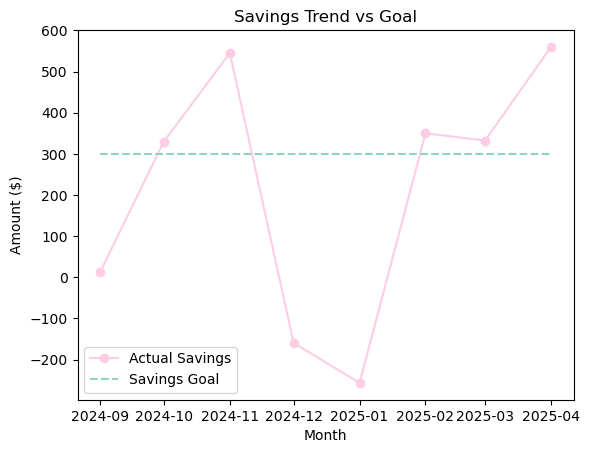

In [517]:
monthly_totals["Month"] = monthly_totals["Month"].dt.to_timestamp()

goal = 300  # constant savings goal

monthly_totals = monthly_totals.sort_values("Month")

plt.plot(monthly_totals["Month"], monthly_totals["Money Left Over"],marker="o",label="Actual Savings", color="#fccde5")

plt.plot(monthly_totals["Month"],[goal]*len(monthly_totals),linestyle="--",color="#8dd3c7",label="Savings Goal")

plt.title("Savings Trend vs Goal")

plt.xlabel("Month")

plt.ylabel("Amount ($)")

plt.legend()

plt.show()

Now more conclusions can be drawn:

- January and December are the only months where spending exceeded income

- The saving goal was surpassed in 5/8 months, which are represented by points above the saving goal line

- Ultimately, saving was inconsistent over the course of the 8 months

Total amount saved in eight months:

In [518]:
(monthly_totals["Money Left Over"].sum()).round(2)

1713.81

# ★ Category Breakdowns

What is the money being spent on?

A table can be used to summarize how much was spent in every category, as well as what percentage of the total every category makes up.



In [519]:
category_spending = df.groupby("Category")["Amount"].sum()

category_spending = category_spending.reset_index()

category_spending = category_spending.sort_values(by = "Amount", ascending = False)

category_spending["Percent of Total (%)"] = ((category_spending["Amount"] / category_spending["Amount"].sum()) * 100).round(2)

category_spending

,Category,Amount,Percent of Total (%)
1,Clothing,1341.75,18.93
8,Meals & Drinks,1301.44,18.37
11,Transportation,974.30,13.75
6,Food & Snacks,802.88,11.33
7,Gifts,696.58,9.83
2,Cosmetics,450.01,6.35
10,School,425.13,6.00
5,Entertainment,389.90,5.50
0,Activities,385.96,5.45
9,Miscellaneous,152.54,2.15


It can be easily observed that clothing expenses make up the largest percentage of the total spent. 

Over $1300 was spent on clothes, $1300 on Meals & Drinks, and nearly $1000 on Transportation.

➤ A pie chart will provide a clear and useful visual for the overall category breakdown:

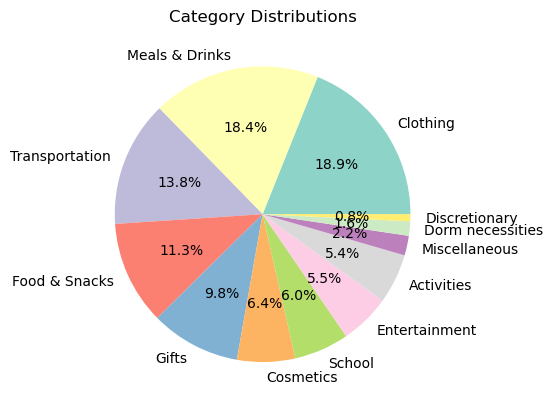

In [506]:
plt.pie(category_spending["Percent of Total (%)"], labels = category_spending["Category"], autopct="%1.1f%%", colors=plt.cm.Set3.colors)
plt.title("Category Distributions")
plt.show()

Some more observations:

- The top three categories make up more than 50% of the total spent

- The smallest expenses were Miscellaenous, Dorm Necessities, and Discretionary expenses

It is clear which categories have the biggest weight on the total amount spent, and which ones have less of an impact.
This is particularly useful if we want to look into which category spending should be limited in order to increase overall savings. 

Now that we have vizualized the overall category breakdown, we can breakdown the categories for every month. 

A pivot table can be created to combine Months, Categories, and Amounts into one dataset, which would facilitate the monthly category distribution.

In [507]:
monthly_categories = df.pivot_table(index = "Month", columns = "Category", values = "Amount", aggfunc="sum", fill_value = 0)

monthly_categories

Category,Activities,Clothing,Cosmetics,Discretionary,Dorm necessities,Entertainment,Food & Snacks,Gifts,Meals & Drinks,Miscellaneous,School,Transportation
Month,,,,,,,,,,,,
2024-09,0.00,445.21,0.00,0.00,53.76,96.39,127.23,0.00,167.32,21.03,24.15,152.38
2024-10,0.00,282.52,127.28,0.00,0.00,67.25,87.69,0.00,172.39,32.89,0.00,0.00
2024-11,142.65,61.02,64.20,0.00,0.00,24.52,125.66,0.00,121.05,12.57,0.00,3.38
2024-12,29.84,289.77,13.59,0.00,0.00,0.00,68.30,413.20,84.59,6.22,0.00,353.87
2025-01,63.17,124.54,45.72,0.00,0.00,142.80,128.10,0.00,155.31,32.30,392.75,271.85
2025-02,0.00,50.42,112.82,0.00,28.29,8.93,130.24,44.54,353.43,21.19,0.00,0.00
2025-03,150.30,41.82,73.46,3.71,0.00,50.01,92.27,0.00,145.05,18.30,0.00,192.82
2025-04,0.00,46.45,12.94,50.76,29.18,0.00,43.39,238.84,102.30,8.04,8.23,0.00


➤ Using the pivot table, a stacked bar graph can be created to easily visualize the category breakdown. 

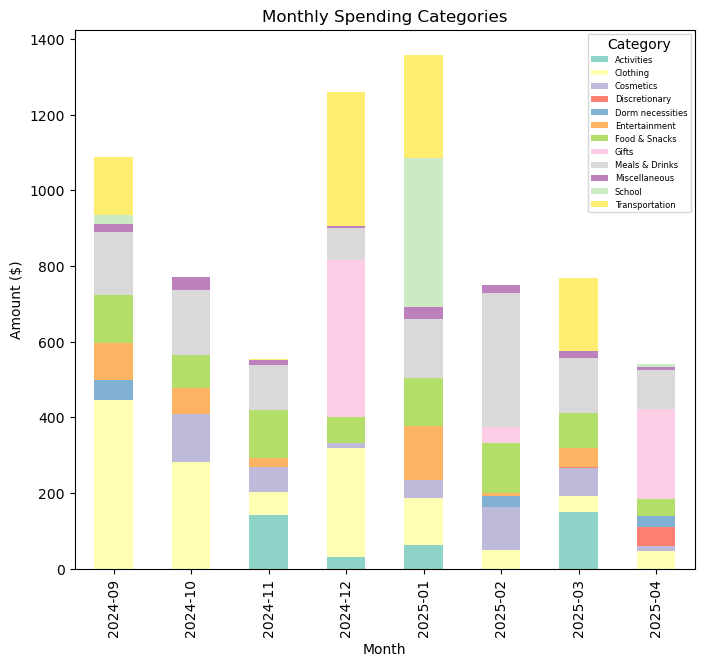

In [508]:
monthly_categories.plot(kind ="bar", stacked = True, figsize =(8,7), colormap="Set3")

plt.title("Monthly Spending Categories")

plt.xlabel("Month")

plt.ylabel("Amount ($)")

plt.legend(title="Category", fontsize=6)

plt.show()

Now the following observations can be made:

- Transportation was most expensive in September, December, January, and March

- Clothing was the biggest expense for September and October

- Meals & Drinks were a significant expense every month

- Activities, Food & Snacks, Dorm necessities, Miscellaneous, and the remaning categories are a relatively small expense for most months

# ★ Spending Forecast

A prediction for spending in the ninth month can be calculated by averaging the last three months of spending data.

In [509]:
x = np.arange(1, len(monthly_totals)+1)  

y = monthly_totals["Total Spent"].values

m, b = np.polyfit(x, y, 1)

month_nine = m*(len(monthly_totals)+1) + b

print(f"Predicted spending for month 9: ${month_nine:.2f}")

Predicted spending for month 9: $716.42


To vizualize where this data point exists relative to the previous amounts, a visual with all points as well as a trend line would be useful.

➤ A scatterplot is highly effective in this case:

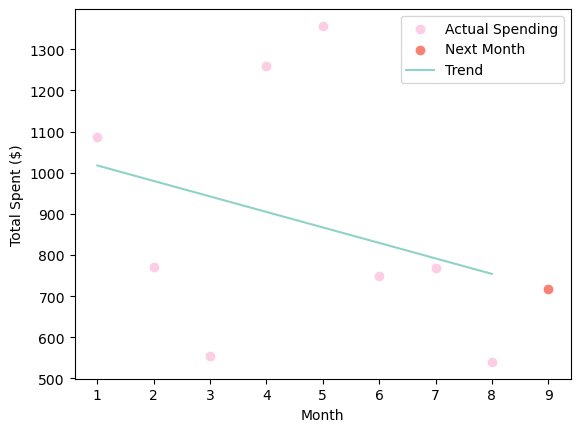

In [510]:
x_9 = 9
y_9 = month_nine


plt.scatter(x, y, label="Actual Spending", color = "#fccde5")   
plt.scatter(x_9,y_9, label = "Next Month", color = "#fb8072")    
plt.plot(x, m*x + b, color = "#8dd3c7", label="Trend") 

plt.xlabel("Month")
plt.ylabel("Total Spent ($)")
plt.legend()
plt.show()

# ★ Final Insights

In summary, the analysis of eight months of transaction data has led to the following conclusions:

- **Monthly Spending Trend:** Monthly spending averaged **$885.77**, with a peak of **$1356.54 in January** due to higher school and transportation costs.  

- **Savings Goal:** The $300 savings goal was met in **5 out of 8 months (62.5%)**, but there was significant overspending in January and December. 

- **Category Breakdown:** Clothing accounted for ~20% of total spending, while **Meals & Drinks** and **Transportation** were also in the top 3 categories. 

- **Forecast:** A simple linear model predicts spending of **~$716.42 next month**, slightly below the average.  


**Recommendation:** Reducing discretionary spending in Clothing and Meals & Drinks would increase the likelihood of hitting savings targets.  

In [521]:
df.to_csv("cleaned_spending.csv", index = False)

In [524]:
monthly_totals.to_csv("monthly_totals.csv", index = False)

In [525]:
category_spending.to_csv("category_breakdown.csv", index = False)